# Breast Cancer Classification

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('breastcancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df = df.drop('id',axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [21]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [22]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [30]:
y_pred_train = lr.predict(X_train_scaled)
train_lr_acc = accuracy_score(y_train,y_pred_train)
print(f'Train Accuracy: {train_lr_acc}')
print(f'Classification Report: \n{classification_report(y_train, y_pred_train)}')

Train Accuracy: 0.9868131868131869
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.98      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



In [31]:
y_pred_test = lr.predict(X_test_scaled)
test_lr_acc = accuracy_score(y_test,y_pred_test)
print(f'Test Accuracy: {test_lr_acc}')
print(f'Classification Report: \n{classification_report(y_test, y_pred_test)}')

Test Accuracy: 0.9736842105263158
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
from sklearn.svm import SVC

#svm with linear kernel
lsvm = SVC(kernel = 'linear')
lsvm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [33]:
train_lsvm_acc = lsvm.score(X_train_scaled, y_train)
print(f'Train Accuracy: {train_lsvm_acc}')
print(f'Classification Report: \n{classification_report(y_train, lsvm.predict(X_train_scaled))}')

Train Accuracy: 0.9868131868131869
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.98      0.98      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [34]:
test_lsvm_acc = lsvm.score(X_test_scaled, y_test)
print(f'Train Accuracy: {test_lsvm_acc}')
print(f'Classification Report: \n{classification_report(y_test, lsvm.predict(X_test_scaled))}')

Train Accuracy: 0.956140350877193
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
#SVM with guasian kernel
gsvm = SVC(kernel = 'rbf')
gsvm.fit(X_train_scaled, y_train)

SVC()

In [36]:
train_gsvm_acc = gsvm.score(X_train_scaled, y_train)
print(f'Train Accuracy: {train_gsvm_acc}')
print(f'Classification Report: \n{classification_report(y_train, gsvm.predict(X_train_scaled))}')

Train Accuracy: 0.989010989010989
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       286
           1       1.00      0.97      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [37]:
test_gsvm_acc = gsvm.score(X_test_scaled, y_test)
print(f'Train Accuracy: {test_gsvm_acc}')
print(f'Classification Report: \n{classification_report(y_test, gsvm.predict(X_test_scaled))}')

Train Accuracy: 0.9824561403508771
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [38]:
#SVM with ploy kernel
psvm = SVC(kernel = 'poly')
psvm.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [39]:
train_psvm_acc = psvm.score(X_train_scaled, y_train)
print(f'Train Accuracy: {train_psvm_acc}')
print(f'Classification Report: \n{classification_report(y_train, psvm.predict(X_train_scaled))}')

Train Accuracy: 0.9142857142857143
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       286
           1       1.00      0.77      0.87       169

    accuracy                           0.91       455
   macro avg       0.94      0.88      0.90       455
weighted avg       0.92      0.91      0.91       455



In [40]:
test_psvm_acc = psvm.score(X_test_scaled, y_test)
print(f'Train Accuracy: {test_psvm_acc}')
print(f'Classification Report: \n{classification_report(y_test, psvm.predict(X_test_scaled))}')

Train Accuracy: 0.868421052631579
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        71
           1       1.00      0.65      0.79        43

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114



In [41]:
#SVM with sigmoid kernel
ssvm = SVC(kernel = 'sigmoid')
ssvm.fit(X_train_scaled, y_train)

SVC(kernel='sigmoid')

In [42]:
train_ssvm_acc = ssvm.score(X_train_scaled, y_train)
print(f'Train Accuracy: {train_ssvm_acc}')
print(f'Classification Report: \n{classification_report(y_train, ssvm.predict(X_train_scaled))}')

Train Accuracy: 0.9494505494505494
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       286
           1       0.95      0.91      0.93       169

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455



In [43]:
test_ssvm_acc = ssvm.score(X_test_scaled, y_test)
print(f'Train Accuracy: {test_ssvm_acc}')
print(f'Classification Report: \n{classification_report(y_test, ssvm.predict(X_test_scaled))}')

Train Accuracy: 0.956140350877193
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [44]:
results = {
    'Model': ['Logistic Regression', 'Linear SVM', 'Gaussian SVM', 'Polynomial SVM', 'Sigmoid SVM'],
    'Train Accuracy': [train_lr_acc, train_lsvm_acc, train_gsvm_acc, train_psvm_acc, train_ssvm_acc],
    'Test Accuracy': [test_lr_acc, test_lsvm_acc, test_gsvm_acc, test_psvm_acc, test_ssvm_acc]
}

df_results = pd.DataFrame(results)
df_results

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.986813,0.973684
1,Linear SVM,0.986813,0.956140
2,Gaussian SVM,0.989011,0.982456
3,Polynomial SVM,0.914286,0.868421
4,Sigmoid SVM,0.949451,0.956140


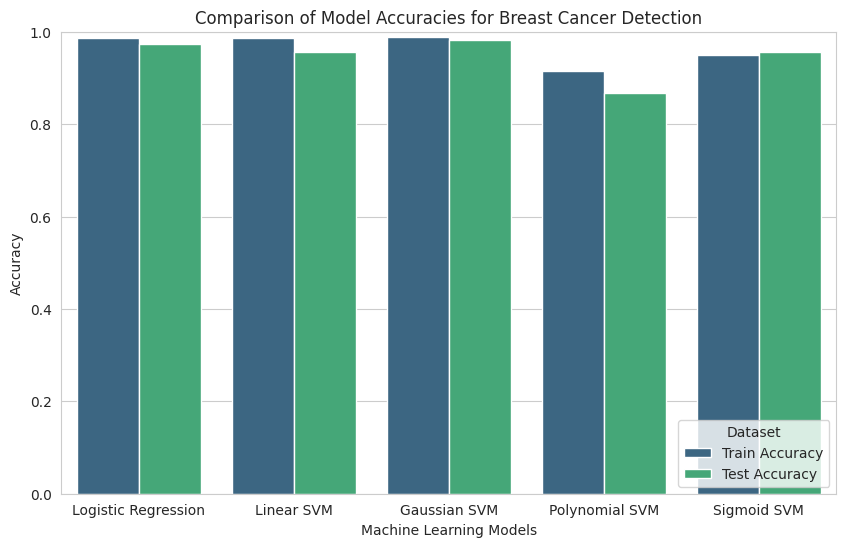

In [45]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the results
sns.barplot(data=df_results.melt(id_vars='Model', var_name='Dataset', value_name='Accuracy'),
            x='Model', y='Accuracy', hue='Dataset', palette='viridis')

# Add titles and labels
plt.title('Comparison of Model Accuracies for Breast Cancer Detection')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit for better comparison
plt.legend(title='Dataset', loc='lower right')

plt.show()


In [46]:
import joblib

# Save each model
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(lsvm, 'linear_svm_model.pkl')
joblib.dump(gsvm, 'gaussian_svm_model.pkl')
joblib.dump(psvm, 'polynomial_svm_model.pkl')
joblib.dump(ssvm, 'sigmoid_svm_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [50]:
from google.colab import files

# Download each model
files.download('logistic_regression_model.pkl')
files.download('linear_svm_model.pkl')
files.download('gaussian_svm_model.pkl')
files.download('polynomial_svm_model.pkl')
files.download('sigmoid_svm_model.pkl')

# Download the scaler
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>